In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
pip install fanalysis

   ---------------------------------------- 0.0/56.3 kB ? eta -:--:--
   --------------------- ------------------ 30.7/56.3 kB 640.0 kB/s eta 0:00:01
   ---------------------------------------- 56.3/56.3 kB 980.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
data_cnn = pd.read_csv('Uncleaned_Cnn.csv').drop_duplicates()
data_cnn.head()

,title,views,when
0,College grad challenges Justice Thomas' argume...,2.9K views,19 minutes ago
2,"AI needs 'a new era of law and regulation,' sa...",10K views,9 hours ago
3,Hear why Pence wanted to meet with Zelensky an...,86K views,16 hours ago
4,Watch as verdict is read in former Parkland sc...,26K views,21 hours ago
5,Legal analyst identifies part of ruling that l...,86K views,1 day ago


In [13]:
data_cnn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 427 entries, 0 to 427
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   427 non-null    object
 1   views   427 non-null    object
 2   when    427 non-null    object
dtypes: object(3)
memory usage: 13.3+ KB


In [14]:
data_cnn['when'].value_counts()

when
3 months ago      99
1 month ago       92
2 months ago      81
4 months ago      66
3 weeks ago       22
2 weeks ago       18
4 weeks ago        7
8 days ago         4
9 days ago         4
3 days ago         4
1 day ago          4
6 days ago         3
7 days ago         3
4 days ago         3
2 days ago         3
5 days ago         2
10 days ago        2
11 days ago        2
12 days ago        2
13 days ago        2
9 hours ago        1
21 hours ago       1
16 hours ago       1
19 minutes ago     1
Name: count, dtype: int64

In [15]:
def month_grouping(date):
    if date == '4 months ago':
        return '4 months ago'
    elif date == '3 months ago':
        return '3 months ago'
    elif date == '2 months ago':
        return '2 months ago'
    elif date == '1 month ago':
        return '1 months ago'
    else:
        return 'this month'

In [16]:
data_cnn['month_group'] = data_cnn['when'].apply(lambda x: month_grouping(x))
data_cnn.head()

,title,views,when,month_group
0,College grad challenges Justice Thomas' argume...,2.9K views,19 minutes ago,this month
2,"AI needs 'a new era of law and regulation,' sa...",10K views,9 hours ago,this month
3,Hear why Pence wanted to meet with Zelensky an...,86K views,16 hours ago,this month
4,Watch as verdict is read in former Parkland sc...,26K views,21 hours ago,this month
5,Legal analyst identifies part of ruling that l...,86K views,1 day ago,this month


In [17]:
data_cnn['month_group'] = pd.Categorical(data_cnn['month_group'], categories=['4 months ago', '3 months ago', '2 months ago', '1 months ago', 'this month'], ordered=True)
data_cnn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 427 entries, 0 to 427
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   title        427 non-null    object  
 1   views        427 non-null    object  
 2   when         427 non-null    object  
 3   month_group  427 non-null    category
dtypes: category(1), object(3)
memory usage: 14.0+ KB


In [18]:
def extract_view(view):
    view_num = view.split(' ')[0]
    if view_num[-1] == 'M':
        view_num = float(view_num.replace('M', '')) * 1000000
    elif view_num[-1] == 'K':
        view_num = float(view_num.replace('K', '')) * 1000
    else:
        view_num = float(view_num)
    return view_num

In [19]:
data_cnn['views_num'] = data_cnn['views'].apply(lambda x: extract_view(x))
data_cnn.head()

,title,views,when,month_group,views_num
0,College grad challenges Justice Thomas' argume...,2.9K views,19 minutes ago,this month,2900.0
2,"AI needs 'a new era of law and regulation,' sa...",10K views,9 hours ago,this month,10000.0
3,Hear why Pence wanted to meet with Zelensky an...,86K views,16 hours ago,this month,86000.0
4,Watch as verdict is read in former Parkland sc...,26K views,21 hours ago,this month,26000.0
5,Legal analyst identifies part of ruling that l...,86K views,1 day ago,this month,86000.0


In [20]:
data_cnn['month_group'].value_counts()

month_group
3 months ago    99
1 months ago    92
this month      89
2 months ago    81
4 months ago    66
Name: count, dtype: int64

In [21]:
avg_view = data_cnn.groupby('month_group').agg({'views': 'count', 'views_num': 'sum'}).\
    reset_index()\
    .rename({'views': 'video_count'}, axis=1)
avg_view['avg_view'] = avg_view['views_num'] / avg_view['video_count']
avg_view

C:\Users\NHQE1\AppData\Local\Temp\ipykernel_9532\615635560.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_view = data_cnn.groupby('month_group').agg({'views': 'count', 'views_num': 'sum'}).\


,month_group,video_count,views_num,avg_view
0,4 months ago,66,26833000.0,406560.606061
1,3 months ago,99,39286700.0,396835.353535
2,2 months ago,81,23998200.0,296274.074074
3,1 months ago,92,23779000.0,258467.391304
4,this month,89,21936900.0,246482.022472


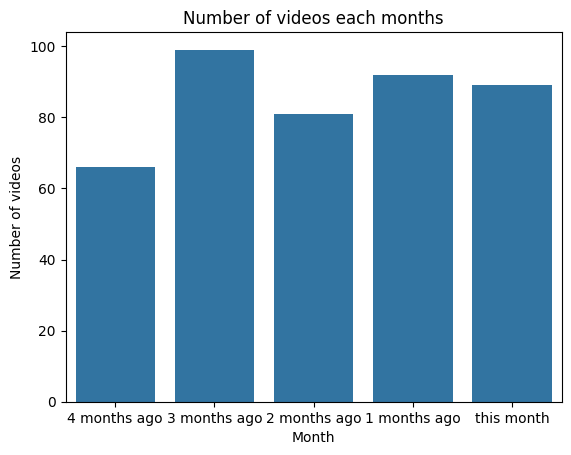

In [22]:
sns.countplot(data=data_cnn, x = 'month_group')
plt.xlabel('Month')
plt.ylabel('Number of videos')
plt.title('Number of videos each months')
plt.show()

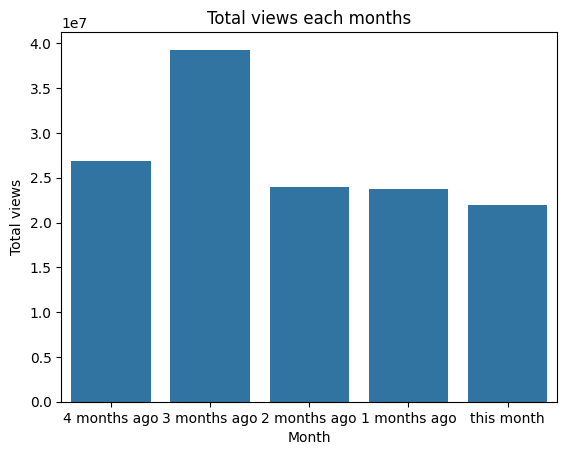

In [23]:
sns.barplot(data=avg_view, x = 'month_group', y='views_num', errorbar=('ci', False))
plt.xlabel('Month')
plt.ylabel('Total views')
plt.title('Total views each months')
plt.show()

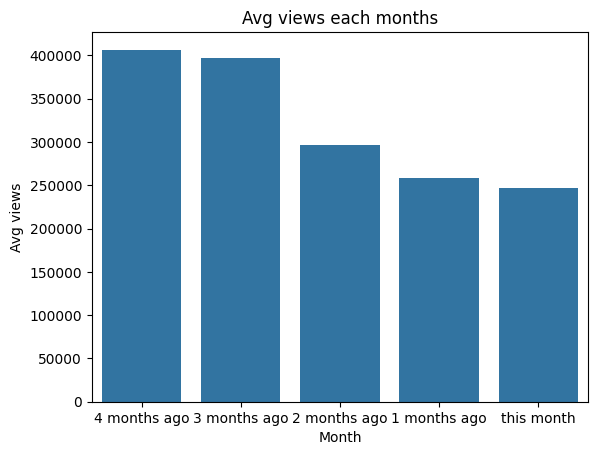

In [24]:
sns.barplot(data=avg_view, x = 'month_group', y='avg_view', errorbar=('ci', False))
plt.xlabel('Month')
plt.ylabel('Avg views')
plt.title('Avg views each months')
plt.show()